## Project: Wrangling - Analyze Data

## Data Gathering


#### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json

In [2]:
#Importation de twitter_archive_enhanced
twitter_archive =  pd.read_csv('twitter_archive_enhanced.csv')

#### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Importation de image_predictions 
reponse = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv','wb') as file:
    file.write(reponse.content)
    image_prediction =reponse.content

In [4]:
#Importation du fichier image_prediction
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

#### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [46]:
#Installation du package tweepy
#! pip install tweepy

In [35]:
# Iportation des packages
import tweepy
from tweepy import OAuthHandler
import json

from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 126


Success
881: 760539183865880579
Success
882: 760521673607086080
Success
883: 760290219849637889
Success
884: 760252756032651264
Success
885: 760190180481531904
Success
886: 760153949710192640
Success
887: 759943073749200896
Success
888: 759923798737051648
Fail
889: 759846353224826880
Success
890: 759793422261743616
Success
891: 759566828574212096
Fail
892: 759557299618865152
Success
893: 759447681597108224
Success
894: 759446261539934208
Success
895: 759197388317847553
Success
896: 759159934323924993
Success
897: 759099523532779520
Success
898: 759047813560868866
Success
899: 758854675097526272
Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 7

Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168: 721503162398597120
Fail
1169: 721001180231503872
Fail
1170: 720785406564900865
Fail
1171: 720775346191278080
Fail
1172: 720415127506415616
Fail
1173:

Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
1433: 697482927769255936
Success
1434: 697463031882764288
Success
1435: 697270446429966336
Success
1436: 697259378236399616
Success
1437: 697255105972801536
Success
1438: 697242256848379904
Success
1439: 696900204696625153
Success
1440: 696894894812565505
Success
1441: 696886256886657024
Success
1442: 696877980375769088
Success
1443: 696754882863349760
Success
1444: 696744641916489729
Success
1445: 696713835009417216
Success
1446: 696518437233913856
Success
1447: 696490539101908992
Success
14

Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
1682: 681981167097122816
Success
1683: 681891461017812993
Success
1684: 681694085539872773
Success
1685: 681679526984871937
Success
1686: 681654059175129088
Success
1687: 681610798867845120
Success
1688: 681579835668455424
Success
1689: 681523177663676416
Success
1690: 681340665377193984
Success
1691: 681339448655802368
Success
1692: 681320187870711809
Success
1693: 681302363064414209
Success
1694: 681297372102656000
Success
1695: 681281657291280384
Success
1696: 681261549936340994
Success
16

Success
1916: 674318007229923329
Success
1917: 674307341513269249
Success
1918: 674291837063053312
Success
1919: 674271431610523648
Success
1920: 674269164442398721
Success
1921: 674265582246694913
Success
1922: 674262580978937856
Success
1923: 674255168825880576
Success
1924: 674082852460433408
Success
1925: 674075285688614912
Success
1926: 674063288070742018
Success
1927: 674053186244734976
Success
1928: 674051556661161984
Success
1929: 674045139690631169
Success
1930: 674042553264685056
Success
1931: 674038233588723717
Success
1932: 674036086168010753
Success
1933: 674024893172875264
Success
1934: 674019345211760640
Success
1935: 674014384960745472
Success
1936: 674008982932058114
Success
1937: 673956914389192708
Success
1938: 673919437611909120
Success
1939: 673906403526995968
Success
1940: 673887867907739649
Success
1941: 673716320723169284
Success
1942: 673715861853720576
Success
1943: 673711475735838725
Success
1944: 673709992831262724
Success
1945: 673708611235921920
Success
19

Success
2165: 669371483794317312
Success
2166: 669367896104181761
Success
2167: 669363888236994561
Success
2168: 669359674819481600
Success
2169: 669354382627049472
Success
2170: 669353438988365824
Success
2171: 669351434509529089
Success
2172: 669328503091937280
Success
2173: 669327207240699904
Success
2174: 669324657376567296
Success
2175: 669216679721873412
Success
2176: 669214165781868544
Success
2177: 669203728096960512
Success
2178: 669037058363662336
Success
2179: 669015743032369152
Success
2180: 669006782128353280
Success
2181: 669000397445533696
Success
2182: 668994913074286592
Success
2183: 668992363537309700
Success
2184: 668989615043424256
Success
2185: 668988183816871936
Success
2186: 668986018524233728
Success
2187: 668981893510119424
Success
2188: 668979806671884288
Success
2189: 668975677807423489
Success
2190: 668967877119254528
Success
2191: 668960084974809088
Success
2192: 668955713004314625
Success
2193: 668932921458302977
Success
2194: 668902994700836864
Success
21

Rate limit reached. Sleeping for: 227


Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
2336: 666287406224695296
Success
2337: 666273097616637952
Success
2338: 666268910803644416
Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
2341: 666099513787052032
Success
2342: 666094000022159362
Success
2343: 666082916733198337
Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
6141.238558292389
{8882025155730882

In [5]:
#Importation de notre dataset tweet_json.csv
df_json = pd.read_json('tweet_json.txt', lines = True)

In [6]:
df_tweet = df_json.loc[:,['id','retweet_count','favorite_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.


- #### Visual assessment :

### twitter_archive_enhanced

In [7]:
#Display the twitter_archive_enhanced table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Dans ce dataset twitter_archive_enhanced, nous avons 2356 lignes et 17 colonnes.

- **tweet_id:** int, id du tweeter
- **in_reply_to_status_id:** int, id de la réponse statut
- **in_reply_to_user_id:** int, id de la réponse du user
- **timestamp:** datetime, date du tweet
- **source:** string, liens de la source
- **text:** string, commentaire
- **retweeted_status_id:** int, id du retweet
- **retweeted_status_user_id:** int, id du retweet pour le user
- **retweeted_status_timestamp:** datetime, date du retweet
- **expanded_urls:** string, liens du compte rate_dogs
- **rating_numerator:** int, note donnée comme numérateur
- **rating_denominator:** int, note donnée comme dénominateur
- **name:** string, nom du tweeter
- **doggo:**catégorie de chien doggo
- **flooper:** catégorie de chien flooper
- **puppo:** catégorie de chien puppo
- **pupper:** catégorie de chien pupper


**************************************
- **puppo,flooper,puppo, pupper:** sont des observations au lieu des colonnes
- **rating_numerator, rating_denominator** grand écart entre les notes
- **expanded_urls:** présence du mot status et id du tweet dans l'url


- **Données manquantes**
    - **in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,
    retweeted_status_user_id,retweeted_status_timestamp,expanded_urls**, présence de NAN
    
    - **puppo,flooper,puppo, pupper:** présence de None au lieu de NaN



### tweet_json data

In [8]:
#Display the tweet_json table
df_tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


Dans ce dataset sur les tweets des utilisateurs, nous avons 2354 lignes et 3 colonnes.

- **id:** int id du tweet
- **retweet_count:** int, nombre de retweets
- **favorite_count:** int, nombre de favoris

### image_prediction

In [9]:
#Display the image_prediction table
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Dans ce dataset de prédiction des images, nous avons 2075 lignes et 12 colonnes.

- **tweet_id:** int, id du tweet
- **jpg_url:** string, lien de l'image
- **img_num:** catégorielle
- **p1:** string, espèce de chien
- **p1_conf:** float
- **p1_dog:** variable booléenne
- **p2:** string espèce de chien
- **p2_conf:** float
- **p2_dog:** variable booléenne
- **p3:** string, espèce de chien
- **p3_conf:** float
- **p3_dog** variable booléenne



*******************************************************

- **p1, p2, p3:** nom de l'espèce séparé par _
- **p1, p2, p3:** mélange de nom d'espèce de chiens avec d'autres mots

- #### Programmatic assessment :

### twitter_archive_enhance

In [10]:
#Affichage du dataset avec .head()
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Types
    - timestamp, en str doit être en datetime

- **expanded_urls:** présence de NaN dans la colonne

In [11]:
#Afficher les 5 dernières lignes du jeu de données avec .tail()
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


- **name**, présence de None et de mots en miniscule différents des prénoms des users

In [12]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- Fréqence des mots dans la colonne name
    - **None:** 745 fois
    - **a:** 55 fois
    - **Charlie:** 12 fois
    - **Cooper:** 11 fois
    - **Lucy:** 11 fois

In [13]:
twitter_archive['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

- **source:** présence de balises <a /a> sur les urls

In [14]:
twitter_archive['text'].sample(10)

2334    This is a funny dog. Weird toes. Won't come do...
155     RT @dog_rates: "Good afternoon class today we'...
2013    Exotic underwater dog here. Very shy. Wont ret...
2345    This is the happiest dog you will ever see. Ve...
1286    RT if you are as ready for summer as this pup ...
684     Atlas is back and this time he's got doggles. ...
969     This is Stewie. He will roundhouse kick anyone...
1737    Guys this really needs to stop. We've been ove...
1114    This is Ralpher. He's an East Guinean Flop Dog...
1745    I know everyone's excited for Christmas but th...
Name: text, dtype: object

In [15]:
twitter_archive['text'][671]

'RT @dog_rates: This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.…'

- **text:** présence de lien du compte du user dans le texte déjà enregistré dea la colonne expanded_urls.

- Les Retweets sont identifiés dans notre dataset par 'RT @dog_rates:', c'est ce qui est montré dans cette ligne ci-dessus.

In [16]:
twitter_archive['expanded_urls'].sample(10)

4       https://twitter.com/dog_rates/status/891327558...
1334    https://twitter.com/dog_rates/status/705428427...
1879    https://twitter.com/dog_rates/status/675015141...
1170    https://twitter.com/dog_rates/status/720775346...
9       https://twitter.com/dog_rates/status/890240255...
583     https://twitter.com/dog_rates/status/681694085...
1902    https://twitter.com/dog_rates/status/674644256...
1424    https://twitter.com/dog_rates/status/697990423...
734     https://twitter.com/dog_rates/status/781251288...
155     https://twitter.com/dog_rates/status/806629075...
Name: expanded_urls, dtype: object

In [17]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

- **expanded_urls**, des lignes se répètent dans cette colonne.

In [18]:
twitter_archive['expanded_urls'][0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [19]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- **name**, plusieurs observations pour None, a, Charlie, Cooper, Lucy.

In [20]:
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
import re
results = [re.findall('[a-z]+', i) for i in twitter_archive.name]
results

[['hineas'],
 ['illy'],
 ['rchie'],
 ['arla'],
 ['ranklin'],
 ['one'],
 ['ax'],
 ['one'],
 ['oey'],
 ['assie'],
 ['oda'],
 ['runo'],
 ['one'],
 ['ed'],
 ['tuart'],
 ['liver'],
 ['im'],
 ['eke'],
 ['alphus'],
 ['anela'],
 ['erald'],
 ['effrey'],
 ['such'],
 ['anela'],
 ['one'],
 ['one'],
 ['aya'],
 ['ingus'],
 ['erek'],
 ['oscoe'],
 ['one'],
 ['affles'],
 ['one'],
 ['imbo'],
 ['aisey'],
 ['one'],
 ['illy'],
 ['one'],
 ['arl'],
 ['ola'],
 ['evin'],
 ['one'],
 ['one'],
 ['ogi'],
 ['oah'],
 ['ella'],
 ['rizzwald'],
 ['one'],
 ['usty'],
 ['us'],
 ['tanley'],
 ['lfy'],
 ['oko'],
 ['ey'],
 ['ary'],
 ['one'],
 ['a'],
 ['lliot'],
 ['ouis'],
 ['one'],
 ['ella'],
 ['esse'],
 ['one'],
 ['omeo'],
 ['one'],
 ['ailey'],
 ['uddles'],
 ['ack'],
 ['mmy'],
 ['teven'],
 ['eau'],
 ['noopy'],
 ['one'],
 ['hadow'],
 ['errance'],
 ['hadow'],
 ['mmy'],
 ['ja'],
 ['one'],
 ['enny'],
 ['ante'],
 ['elly'],
 ['inger'],
 ['one'],
 ['enedict'],
 ['enti'],
 ['oose'],
 ['ugget'],
 ['one'],
 ['one'],
 ['ash'],
 ['oco']

- **name**, présence de chaînes de caractères contenant que des lettres en minuscules. C'est une partie qui compose les prénoms des utilisateurs des twitters.  

In [23]:
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [128]:
twitter_archive.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

### tweet_json data

In [24]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Renommer la colonne id en tweet_id

In [25]:
df_tweet.sample(5)

,id,retweet_count,favorite_count
1017,746790600704425984,1806,5345
1678,682003177596559360,1722,3464
1453,695409464418041856,4017,9460
75,878057613040115712,7181,42876
306,835685285446955009,9327,0


In [26]:
df_tweet.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

Pas de données manquantes dans le jeu de données df_tweet.

In [27]:
df_tweet.retweet_count.sort_values()

290         0
1293        2
273         3
341         3
112         3
        ...  
816     52360
1077    52360
259     56625
533     56625
1037    79515
Name: retweet_count, Length: 2354, dtype: int64

In [28]:
df_tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Image predictions

In [29]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,golden_retriever,0.317235,True,Labrador_retriever,0.116087,True
778,689877686181715968,https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg,1,Old_English_sheepdog,0.269155,True,Tibetan_terrier,0.111496,True,Lakeland_terrier,0.104939,True
646,681654059175129088,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538,True,chow,0.146892,True,Pekinese,0.037613,True
545,677314812125323265,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel,0.924127,True,Japanese_spaniel,0.054790,True,Chihuahua,0.008204,True
259,670782429121134593,https://pbs.twimg.com/media/CU8ZDu9WwAADg3N.jpg,1,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
877,698342080612007937,https://pbs.twimg.com/ext_tw_video_thumb/69834...,1,boxer,0.883048,True,Saint_Bernard,0.030579,True,Staffordshire_bullterrier,0.012994,True
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True


Présence de caractères spéciaux(_) entre les mots pour les colonnes p1, p2, p3

In [31]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [32]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Pas de données manquantes dans le jeu de données image_predictions

### 8 problèmes répertoriés dans les datasets

1. Trop de Données manquantes dans les colonnes suivantes(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,              retweeted_status_user_id,retweeted_status_timestamp). Supprimer les colonnes
2. timestamp, un "objet", alors que c'est un datetime

3. Présence de None au lieu de NaN, qui se répète dans la colonne name.

4. expanded_urls, liens qui se répètent sur les lignes.

5. Renommer la colonne id de du dataframe df_tweet

6. doggo, floopper, puppo, pupper présentent des None dans la colonne au lieu des NAN. supprimer les colonnes parce qu'il y a beaucoup de None.

7. Remplacer la chaîne de caractères (_) par ' '  pour les colonnes p1, p2, p3.

8. rating_numerator, rating_denominator, on a un grand écart entre les valeurs dans ces deux colonnes. On va les normaliser.

### Tidiness issues

1. Balises <a /a> présentes dans les enregistrements de la colonne source.


2. text: présence de retweets (RT @dog_rates) dans la colonne des tweets


Combiner les dataframe df_tweet et twitter_archive dans un même tableau. df_tweet est une partie de twitter_archive.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [307]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
df_tweet_copy = df_tweet.copy()
image_predictions_copy = image_predictions.copy()

### Issue #1:

#### Define:

- Supprimer les colonnes  des données manquantes(in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp).

#### Code

In [308]:
twitter_archive_copy[[ 'in_reply_to_status_id',
        'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']]

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN


In [309]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id',
        'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis =1)

#### Test

In [310]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #2:

### Define

- Convertir le type des données de la colonne timestamp, un "objet", en datetime

### Code

In [311]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [312]:
#Conversion de timestamp en datetime
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])

### Test

In [313]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #3:

### Define

- Supprimer toutes les lignes contenant des None dans name.

### Code

In [314]:
twitter_archive_copy[twitter_archive_copy['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [315]:
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy['name']=='None'].index, inplace =True)

### Test

In [316]:
twitter_archive_copy[twitter_archive_copy['name']=='None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [317]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1611 non-null   int64              
 1   timestamp           1611 non-null   datetime64[ns, UTC]
 2   source              1611 non-null   object             
 3   text                1611 non-null   object             
 4   expanded_urls       1611 non-null   object             
 5   rating_numerator    1611 non-null   int64              
 6   rating_denominator  1611 non-null   int64              
 7   name                1611 non-null   object             
 8   doggo               1611 non-null   object             
 9   floofer             1611 non-null   object             
 10  pupper              1611 non-null   object             
 11  puppo               1611 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4:

### Define

- Supprimer les lignes dupliquées dans la colonne expanded_urls.

### Code

In [318]:
twitter_archive_copy[twitter_archive_copy.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
75,878281511006478336,2017-06-23 16:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,2017-06-23 01:10:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,2017-06-09 16:22:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
126,868552278524837888,2017-05-27 19:39:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,2017-05-21 16:48:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
150,863062471531167744,2017-05-12 16:05:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
161,860563773140209665,2017-05-05 18:36:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
169,859196978902773760,2017-05-02 00:04:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
253,844704788403113984,2017-03-23 00:18:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None


In [319]:
twitter_archive_copy.drop_duplicates(subset = ['expanded_urls'], keep = 'first',inplace = True)

### Test

In [320]:
twitter_archive_copy[twitter_archive_copy.expanded_urls.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [321]:

twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1551 non-null   int64              
 1   timestamp           1551 non-null   datetime64[ns, UTC]
 2   source              1551 non-null   object             
 3   text                1551 non-null   object             
 4   expanded_urls       1551 non-null   object             
 5   rating_numerator    1551 non-null   int64              
 6   rating_denominator  1551 non-null   int64              
 7   name                1551 non-null   object             
 8   doggo               1551 non-null   object             
 9   floofer             1551 non-null   object             
 10  pupper              1551 non-null   object             
 11  puppo               1551 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #5:

### Define

- Renommer la colonne id de du dataframe df_tweet

### Code

In [322]:
df_tweet_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

### Test

In [323]:
df_tweet_copy.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #6:

### Define

- Supprimer les colonnes doggo, floofer, puppo, pupper qui présentent beaucoup de données manquantes qui sont des None.

### Code

In [324]:
#Suppression des colonnes doggo, flooofer, puppo, pupper
twitter_archive_copy = twitter_archive_copy.drop(['doggo','floofer','puppo','pupper'],axis = 1)

### Test

In [325]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

### Issue #7:

### Define

- Remplacer la chaîne de caractères (_) par ' '  pour les colonnes p1, p2, p3.

### Code

In [326]:
image_predictions_copy.loc[:,['p1','p2','p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


In [327]:
image_predictions_copy['p1'] = image_predictions_copy['p1'].str.replace('_',' ')

In [328]:
image_predictions_copy['p2'] = image_predictions_copy['p2'].str.replace('_',' ')

In [329]:
image_predictions_copy['p3'] = image_predictions_copy['p3'].str.replace('_',' ')

### Test

In [330]:
image_predictions_copy.loc[:,['p1','p2','p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Issue #8:

### Define

- Normaliser les colonnes rating_numerator et rating_denominator pour réduire l'écart entre les différentes valeurs. 

### Code

In [331]:
#Description de la colonne rating_numerator
twitter_archive_copy['rating_numerator'].describe()

count    1551.000000
mean       12.081883
std        45.189269
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [332]:
#Description de la colonne rating_denominator
twitter_archive_copy['rating_denominator'].describe()

count    1551.000000
mean       10.148291
std         4.313512
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [333]:
#Normalisation de la colonne rating_numerator
twitter_archive_copy['rating_numerator']=(twitter_archive_copy['rating_numerator'] - twitter_archive_copy['rating_numerator'].min()) / ( twitter_archive_copy['rating_numerator'].max() - twitter_archive_copy['rating_numerator'].min())

In [334]:
#Normalisation de la colonne rating_denominator
twitter_archive_copy['rating_denominator']=(twitter_archive_copy['rating_denominator'] - twitter_archive_copy['rating_denominator'].min()) / ( twitter_archive_copy['rating_denominator'].max() - twitter_archive_copy['rating_denominator'].min())

### Test

In [335]:
twitter_archive_copy['rating_numerator'].sample(5)

832     0.006197
2159    0.003380
1946    0.003944
2317    0.004507
343     0.006197
Name: rating_numerator, dtype: float64

In [336]:
twitter_archive_copy['rating_denominator'].sample(5)

1561    0.047619
1289    0.047619
1916    0.047619
1540    0.047619
1037    0.047619
Name: rating_denominator, dtype: float64

### Issue #9:

### Define

- Supprimer les enregistrements contenant des retweets dans text (RT @dog_rates).

### Code

In [337]:
#Afficher les lignes des retweets à l'aide d'une boucle for
for mot in twitter_archive_copy.text:
    if (mot.startswith('RT @dog_rates') == True):
        print(mot)

RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX
RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5
RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…
RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below

https:/…
RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…
RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…
RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF
RT @dog_rates: This is Si

In [338]:
#Nombre de retweets dans la colonne text
twitter_archive_copy.text.astype(str).str.contains('RT @dog_rates').sum()

115

In [339]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1551 entries, 0 to 2354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1551 non-null   int64              
 1   timestamp           1551 non-null   datetime64[ns, UTC]
 2   source              1551 non-null   object             
 3   text                1551 non-null   object             
 4   expanded_urls       1551 non-null   object             
 5   rating_numerator    1551 non-null   float64            
 6   rating_denominator  1551 non-null   float64            
 7   name                1551 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 109.1+ KB


In [340]:
#Supression de toutes les lignes contenant des retweets au niveau de la colonne text commençant par RT @dog_rates
twitter_archive_copy.drop(twitter_archive_copy[twitter_archive_copy.text.astype(str).str.contains('RT @dog_rates')].index,inplace = True)

### Test

In [341]:
twitter_archive_copy.text.astype(str).str.contains('RT @dog_rates').sum()

0

In [342]:
twitter_archive_copy

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,0.006761,0.047619,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,0.006761,0.047619,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,0.006197,0.047619,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,0.006761,0.047619,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,0.006197,0.047619,Franklin
...,...,...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,0.000563,0.047619,an
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,0.005070,0.047619,a
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,0.002817,0.047619,a
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,0.004507,0.047619,a


In [343]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 2354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1436 non-null   int64              
 1   timestamp           1436 non-null   datetime64[ns, UTC]
 2   source              1436 non-null   object             
 3   text                1436 non-null   object             
 4   expanded_urls       1436 non-null   object             
 5   rating_numerator    1436 non-null   float64            
 6   rating_denominator  1436 non-null   float64            
 7   name                1436 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 101.0+ KB


### Issue #10:

### Define

- Supprimer les balises <a /a> dans la colonne source au niveau des liens.

### Code

In [344]:
twitter_archive_copy['source'].sample(5)

1797    <a href="http://twitter.com/download/iphone" r...
1917    <a href="http://twitter.com/download/iphone" r...
737     <a href="http://twitter.com/download/iphone" r...
573     <a href="http://twitter.com/download/iphone" r...
1521    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [345]:
#Afficher la première ligne
twitter_archive_copy['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [349]:
#Extraction du lien pour la colonne source
twitter_archive_copy['source'] =twitter_archive_copy.source.str.extract('(http:\/\/?\D\w+\.\D\w+\/+\D.\D.\w.?\w.\/+\w+)',expand =False)

### Test

In [352]:
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

In [350]:
twitter_archive_copy['source'].sample(100)

1151    http://twitter.com/download/iphone
1941    http://twitter.com/download/iphone
1054    http://twitter.com/download/iphone
2280    http://twitter.com/download/iphone
894     http://twitter.com/download/iphone
                       ...                
370     http://twitter.com/download/iphone
0       http://twitter.com/download/iphone
910     http://twitter.com/download/iphone
842     http://twitter.com/download/iphone
219     http://twitter.com/download/iphone
Name: source, Length: 100, dtype: object

In [351]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 2354
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1436 non-null   int64              
 1   timestamp           1436 non-null   datetime64[ns, UTC]
 2   source              1362 non-null   object             
 3   text                1436 non-null   object             
 4   expanded_urls       1436 non-null   object             
 5   rating_numerator    1436 non-null   float64            
 6   rating_denominator  1436 non-null   float64            
 7   name                1436 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(4)
memory usage: 133.3+ KB


In [79]:
twitter_archive_copy

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,twitter_source
0,892420643555336193,2017-08-01 16:23:56+00:00,None,https://twitter.com/dog_rates/status/892420643...,0.006761,0.047619,Phineas,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27+00:00,None,https://twitter.com/dog_rates/status/892177421...,0.006761,0.047619,Tilly,http://twitter.com/download/iphone
2,891815181378084864,2017-07-31 00:18:03+00:00,None,https://twitter.com/dog_rates/status/891815181...,0.006197,0.047619,Archie,http://twitter.com/download/iphone
3,891689557279858688,2017-07-30 15:58:51+00:00,None,https://twitter.com/dog_rates/status/891689557...,0.006761,0.047619,Darla,http://twitter.com/download/iphone
4,891327558926688256,2017-07-29 16:00:24+00:00,None,https://twitter.com/dog_rates/status/891327558...,0.006197,0.047619,Franklin,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...
2333,666337882303524864,2015-11-16 19:31:45+00:00,None,https://twitter.com/dog_rates/status/666337882...,0.004507,0.047619,an,http://twitter.com/download/iphone
2335,666287406224695296,2015-11-16 16:11:11+00:00,None,https://twitter.com/dog_rates/status/666287406...,0.000000,0.000000,an,http://twitter.com/download/iphone
2345,666063827256086533,2015-11-16 01:22:45+00:00,None,https://twitter.com/dog_rates/status/666063827...,0.005070,0.047619,the,http://twitter.com/download/iphone
2346,666058600524156928,2015-11-16 01:01:59+00:00,None,https://twitter.com/dog_rates/status/666058600...,0.003944,0.047619,the,http://twitter.com/download/iphone


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [353]:
#Sauvegarde du dataset sous le nom de twitter_archive_master.csv
twitter_archive_copy.to_csv('twitter_archive_master.csv',index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [354]:
data_cleaned =pd.read_csv('twitter_archive_master.csv')
data_cleaned.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,0.006761,0.047619,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,0.006761,0.047619,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,0.006197,0.047619,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,0.006761,0.047619,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,0.006197,0.047619,Franklin


In [355]:
data_cleaned.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1431          an
1432           a
1433           a
1434           a
1435           a
Name: name, Length: 1436, dtype: object

Au niveau de la colonne name il y a toujours des observations qui ne sont pas des prénoms car il y a des mots commençant par une lettre majuscule mais qui ne sont pas des noms propres de personnes. En outre, d'autres prénoms sont coupé en syllabes.
Pour cela il faudrait encore creuser sur les données pour voir comment nettoyer définitivement cette colonne.

### Insights:
1. En poussant le wrangling data on se rend contre que le tableau des retweets df_tweet nommé précédemment peut être mergé au tableau principal (twitter_archive). Car il constitue une partie de lui.


2. les retweets supprimés peuvent être replacés dans le tableau des retweets.


3. Revoir la colonne name qui contient toujours des mots qui ne sont nullement pas des noms propres de personnes. 

### Visualization

In [358]:
import matplotlib.pyplot as plt

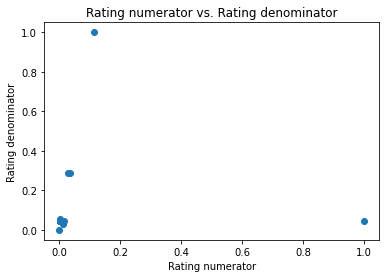

In [363]:
#Scatterplot
plt.scatter(data_cleaned.rating_numerator, data_cleaned.rating_denominator);
plt.title('Rating numerator vs. Rating denominator');
plt.xlabel('Rating numerator');
plt.ylabel('Rating denominator');